In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "top-spotify-tracks-of-2018"

In [2]:
library(gridExtra)
library(ggcorrplot)
library(dplyr)
library(RColorBrewer)
library(MASS)
library(gvlma)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [3]:
my_list <- read.csv("../input/top-spotify-tracks-of-2018/top2018.csv")

In [4]:
head(my_list)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,8.29e-05,0.552,0.357,77.169,198973,4
2,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,3.72e-03,0.123,0.473,75.023,166606,4
3,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,6.56e-05,0.131,0.140,159.847,218147,4
4,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.00e+00,0.112,0.439,140.124,221440,4
5,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,6.00e-05,0.396,0.350,91.030,217925,4
6,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10,-5.843,1,0.0454,0.3540,0.00e+00,0.136,0.374,145.028,231267,4


In [5]:
names(my_list)

[1] "id"               "name"             "artists"          "danceability"    
 [5] "energy"           "key"              "loudness"         "mode"            
 [9] "speechiness"      "acousticness"     "instrumentalness" "liveness"        
[13] "valence"          "tempo"            "duration_ms"      "time_signature"

In [6]:
summary(my_list)

                     id    
 08bNPGLD8AhKpnnERrAc6: 1  
 09IStsImFySgyp0pIQdqA: 1  
 0d2iYfpKoM0QCKvcLCkBa: 1  
 0e7ipj03S05BNilyu5bRz: 1  
 0E9ZjEAyAwOXZ7wJC0PD3: 1  
 0JP9xo3adEtGSdUEISisz: 1  
 (Other)              :94  
                                                      name   
 ?chame La Culpa                                        : 1  
 1, 2, 3 (feat. Jason Derulo & De La Ghetto)            : 1  
 2002                                                   : 1  
 All The Stars (with SZA)                               : 1  
 Back To You - From 13 Reasons Why ? Season 2 Soundtrack: 1  
 Be Alright                                             : 1  
 (Other)                                                :94  
          artists    danceability        energy            key       
 Post Malone  : 6   Min.   :0.2580   Min.   :0.2960   Min.   : 0.00  
 XXXTENTACION : 6   1st Qu.:0.6355   1st Qu.:0.5620   1st Qu.: 1.75  
 Drake        : 4   Median :0.7330   Median :0.6780   Median : 5.00  


In [7]:
colSums(is.na(my_list))

id             name          artists     danceability 
               0                0                0                0 
          energy              key         loudness             mode 
               0                0                0                0 
     speechiness     acousticness instrumentalness         liveness 
               0                0                0                0 
         valence            tempo      duration_ms   time_signature 
               0                0                0                0

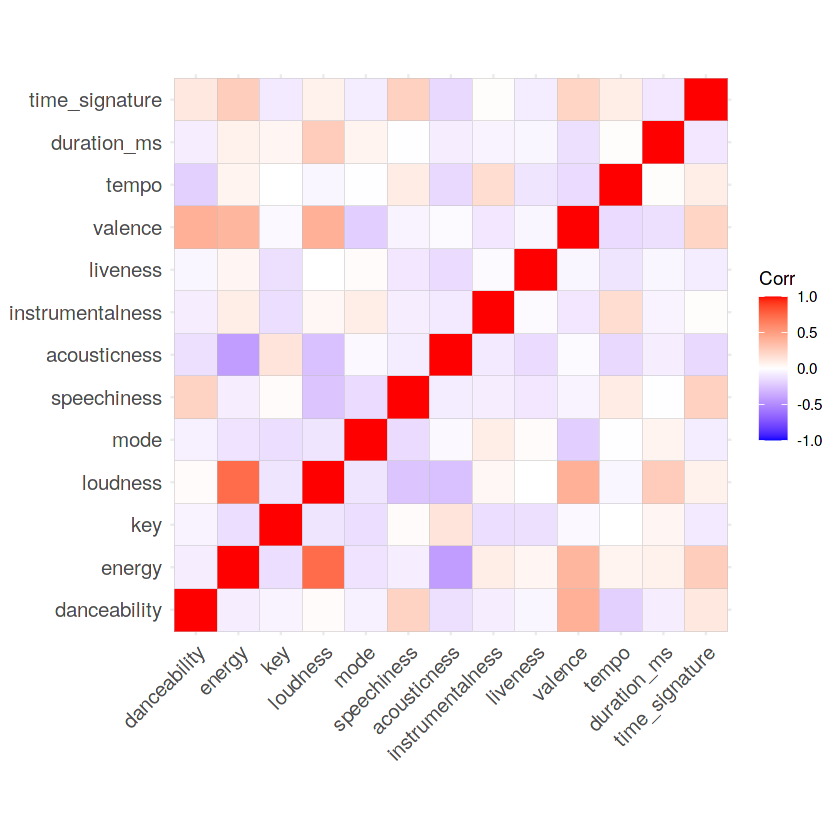

In [8]:
corr <- round(cor(my_list[,4:16]),8)
ggcorrplot(corr)

**It can be observed that the variables [loudness and energy] are correlated to some extent compared to the other variables**

In [9]:
dim(my_list)

[1] 100  16

In [10]:
sapply(my_list, class)

id             name          artists     danceability 
        "factor"         "factor"         "factor"        "numeric" 
          energy              key         loudness             mode 
       "numeric"        "numeric"        "numeric"        "numeric" 
     speechiness     acousticness instrumentalness         liveness 
       "numeric"        "numeric"        "numeric"        "numeric" 
         valence            tempo      duration_ms   time_signature 
       "numeric"        "numeric"        "numeric"        "numeric"

In [11]:
unique(my_list$key)
unique(my_list$mode)
unique(my_list$time_signature)

[1]  7  8  5  1 10  9  2  6  0 11  4  3

[1] 1 0

[1] 4 3 5

In [12]:
my_list$key <- as.factor(my_list$key)
my_list$mode <- as.factor(my_list$mode)
my_list$time_signature <- as.factor(my_list$time_signature)

In [13]:
sapply(my_list, class)

id             name          artists     danceability 
        "factor"         "factor"         "factor"        "numeric" 
          energy              key         loudness             mode 
       "numeric"         "factor"        "numeric"         "factor" 
     speechiness     acousticness instrumentalness         liveness 
       "numeric"        "numeric"        "numeric"        "numeric" 
         valence            tempo      duration_ms   time_signature 
       "numeric"        "numeric"        "numeric"         "factor"

In [14]:
#converting the numerical keys to the actual musical keys
levels(my_list$key)[1]  <-"C"
levels(my_list$key)[2]  <-"C#"
levels(my_list$key)[3]  <-"D"
levels(my_list$key)[4]  <-"D#"
levels(my_list$key)[5]  <-"E"
levels(my_list$key)[6]  <-"F"
levels(my_list$key)[7]  <-"F#"
levels(my_list$key)[8]  <-"G"
levels(my_list$key)[9]  <-"G#"
levels(my_list$key)[10] <-"A"
levels(my_list$key)[11] <-"A#"
levels(my_list$key)[12] <-"B"

In [15]:
#convert the duration milliseonds to mins
my_list$duration_ms <- my_list$duration_ms/60000

In [16]:
#adding popularity column to the my_list
#cbind popularity with the my_list
popularity <- c(1:100)
my_list <- cbind(my_list,popularity)

In [17]:
my_list_1 <- my_list

In [18]:
my_list$valence[my_list$valence > 0.000 & my_list$valence <= 0.350 ] <- "sad"
my_list$valence[my_list$valence >= 0.351 & my_list$valence <= 0.700 ] <- "happy"
my_list$valence[my_list$valence >= 0.701 & my_list$valence <= 1.000 ] <- "Euphoric"



In [19]:
my_list$valence <- as.factor(my_list$valence)

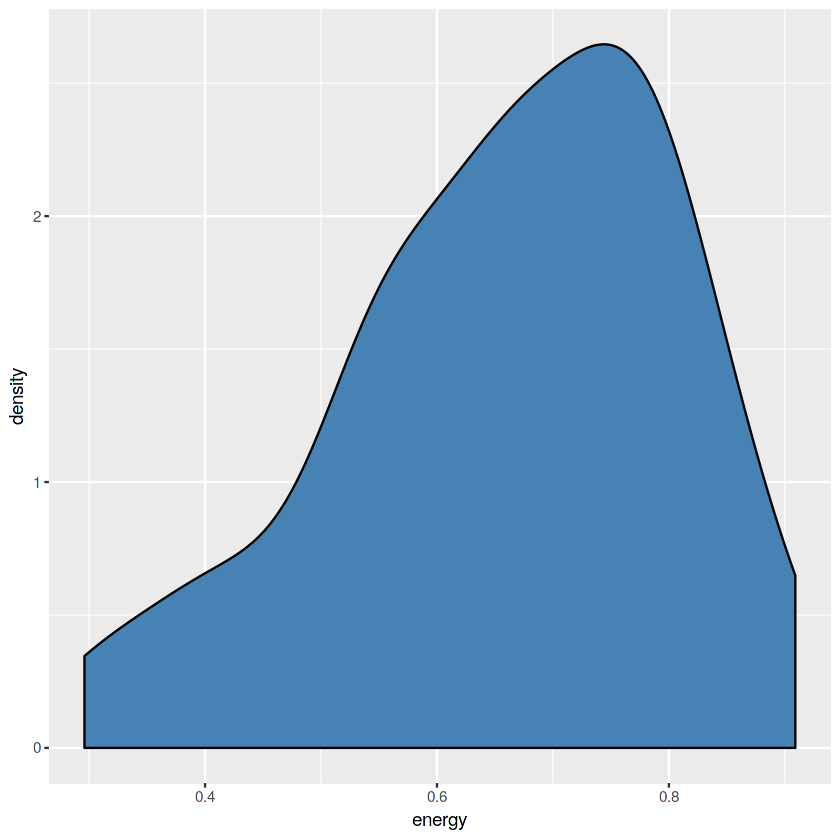

In [20]:
 ggplot(my_list) + geom_density(aes(energy),fill="steelblue")

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

It can be observed the highest intensity of energy level being greater than 0.6 i.e the measure of intensity is quite high for these songs.

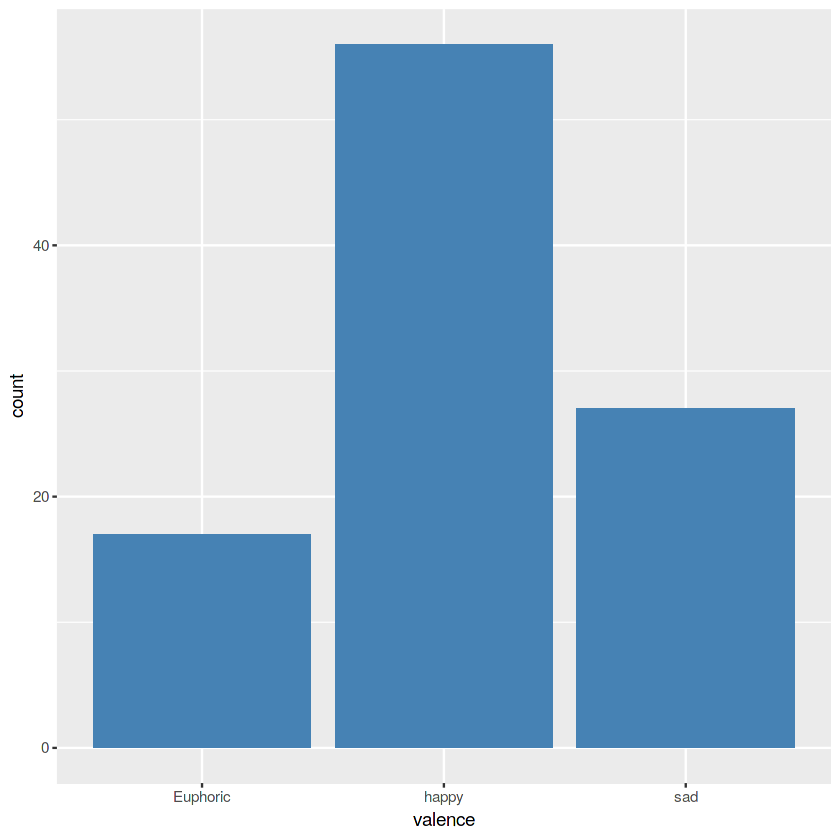

In [21]:
ggplot(my_list) + geom_bar(aes(valence),fill="steelblue")

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. We have made different classes like

**Valence value < 0.350 as sad, 
0.351 < Valence value < 0.701 as happy 
Valence value > 0.700 as Euphoric **.

Tracks with high valence sound more positive.

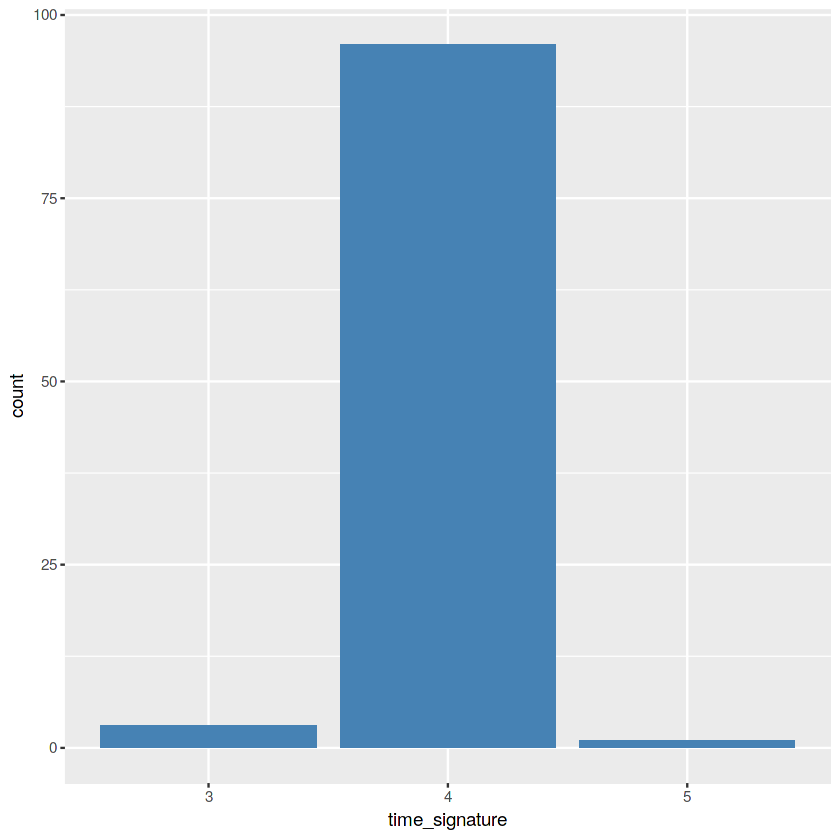

In [22]:
ggplot(my_list) + geom_bar(aes(time_signature),fill="steelblue")

**Time Signature Analysis** The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).We could observe that the top 100 songs have a time signature of 4.


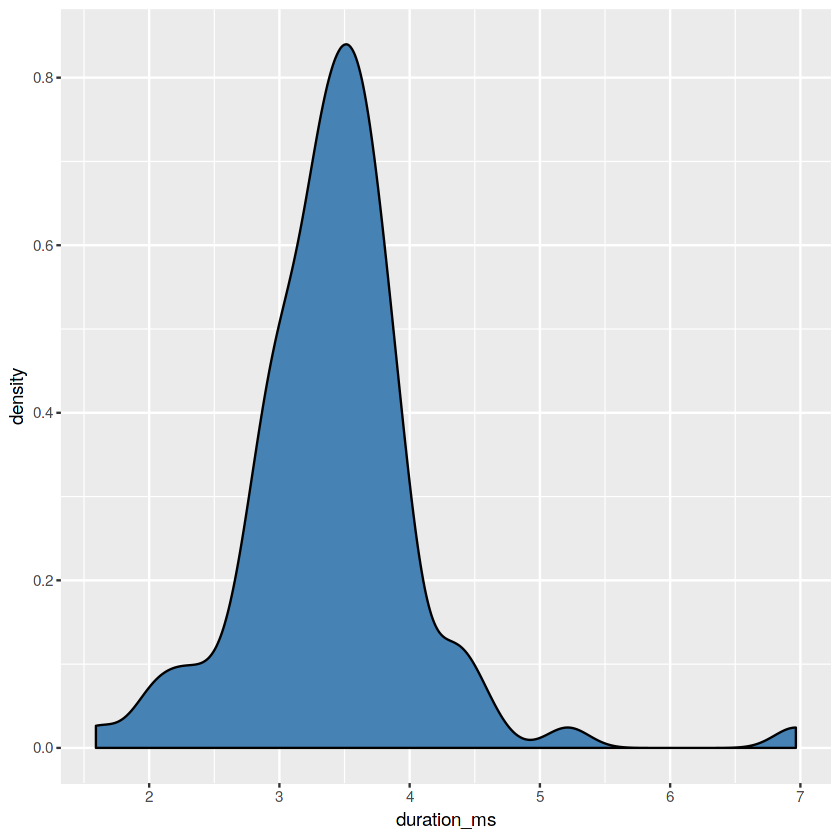

In [23]:
ggplot(my_list) + geom_density(aes(duration_ms),fill="steelblue")

**Duration Analysis** It can be observed that the maximum density is observed in between 3 to 4 mins.

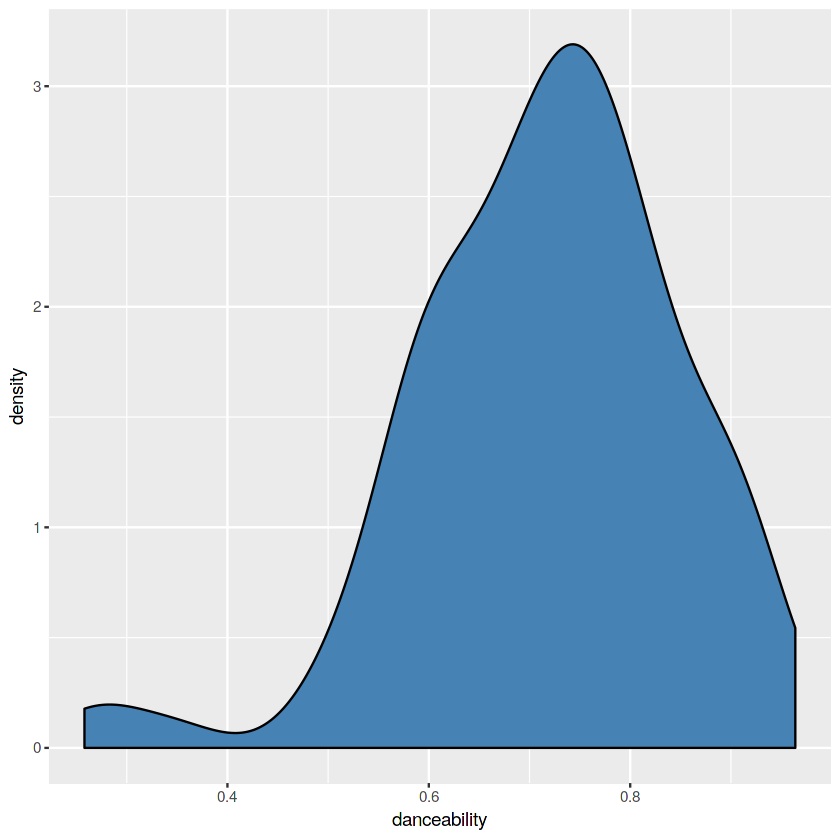

In [24]:
ggplot(my_list) + geom_density(aes(danceability),fill="steelblue")

* **Dancebility analysis **:
Danceability describes how suitable a track is for dancing.A value of 0.0 is least danceable and 1.0 is most danceable.We could see that the distribution inclines more towards the value of 1.

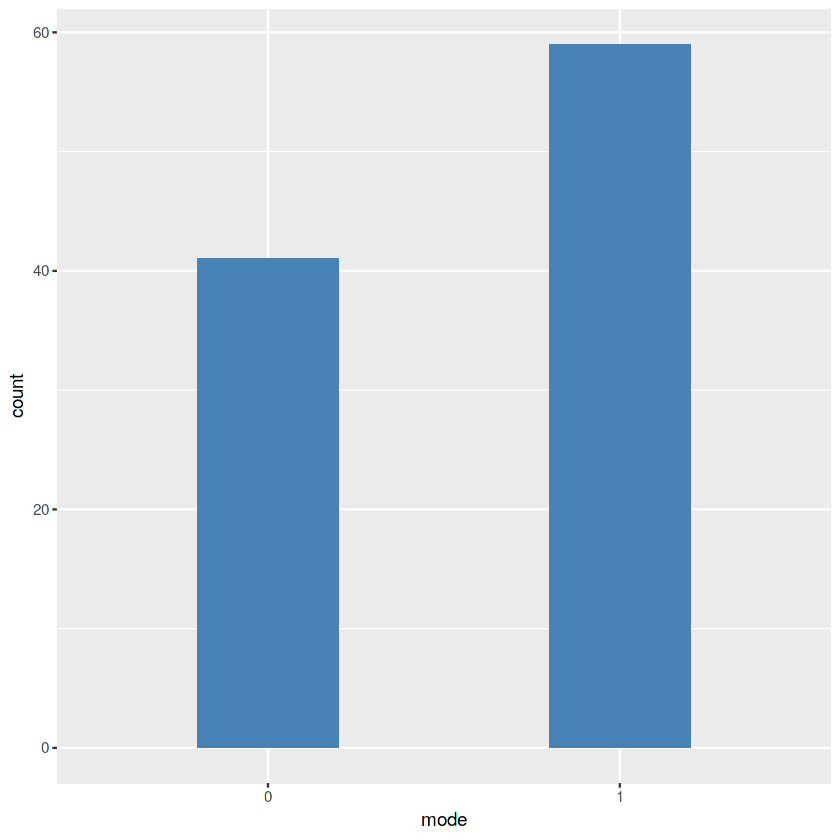

In [25]:
ggplot(my_list) + geom_bar(aes(mode),width = 0.4,fill="steelblue")

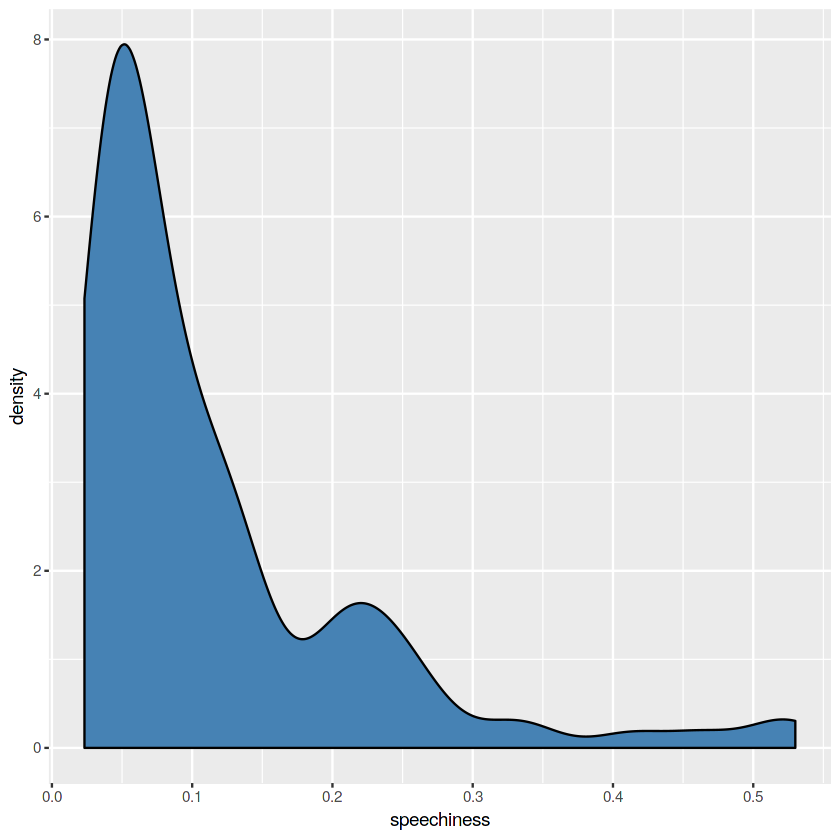

In [26]:
ggplot(my_list) + geom_density(aes(speechiness),fill="steelblue")

* **Speechiness Analysis:**
If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.Thus we can see that the maximum number speechiness observed here is less than 0.33 thus in the top 100 songs mostly does not have speech.

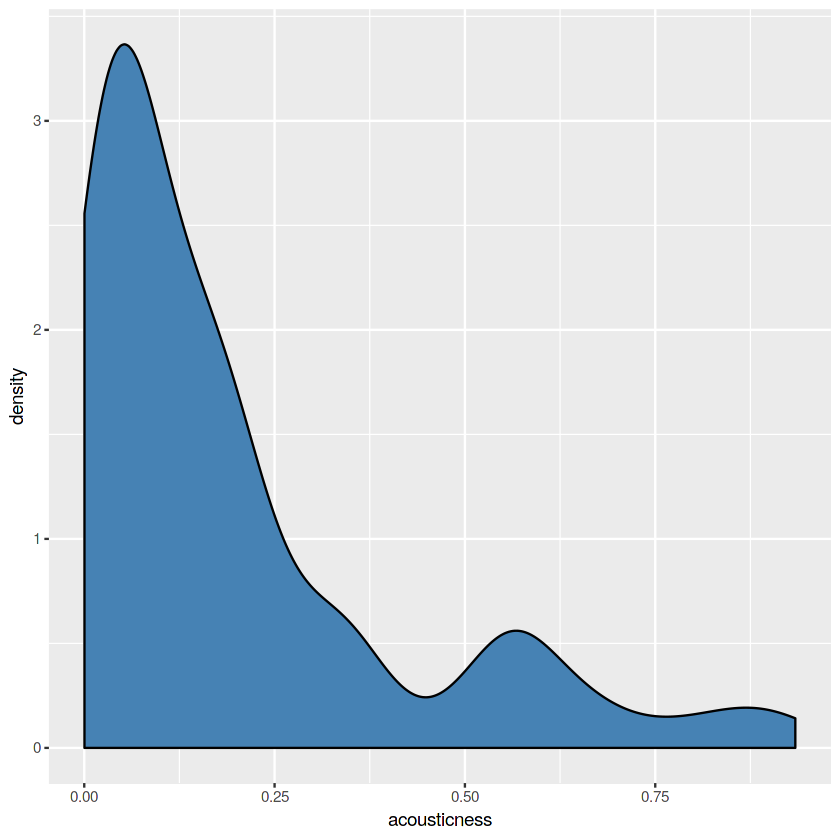

In [27]:
ggplot(my_list) + geom_density(aes(acousticness),fill="steelblue")

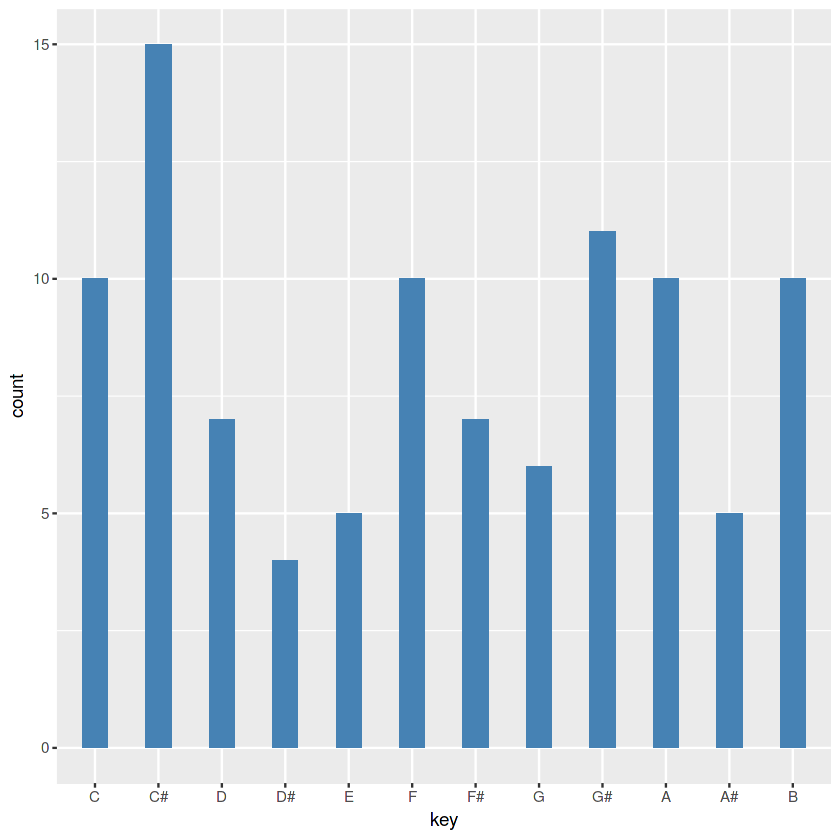

In [28]:
ggplot(my_list) + geom_bar(aes(key),width = 0.4,fill="steelblue")

* **Keys Analysis**
As per the music standards we have transformed the key data to analyse which key has been most popular.
It can be seen that the key C# has most number of occurences.

In [29]:
my_frequency <- data.frame(my_list %>% 
group_by(my_list$artists) %>% 
summarise(no_rows = n()) %>%
arrange(desc(no_rows)))


In [30]:
my_frequency_10 <- my_frequency[1:10,]

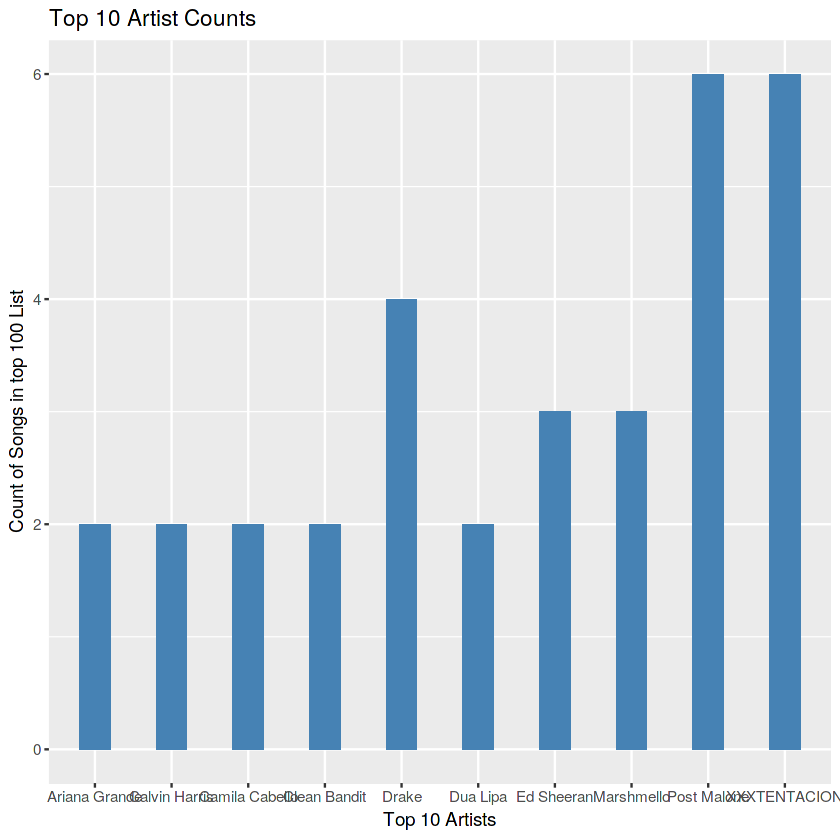

In [31]:
ggplot(my_frequency_10,aes(my_list.artists,no_rows))+
geom_bar(stat = "identity",width=0.4,fill="steelblue")+
labs(x="Top 10 Artists")+
labs(y="Count of Songs in top 100 List")+
labs(title = "Top 10 Artist Counts")

* **Top 10 Artists Analysis **: This is the plot for the top 10 frequencies of the artists in the given top 100.

1. Post Malone having 6 songs
2. XXXTENTACTION having 6 songs are the 2 artists with maximum number of songs in the top 100 list i.e the two artist are the most Popular artists.

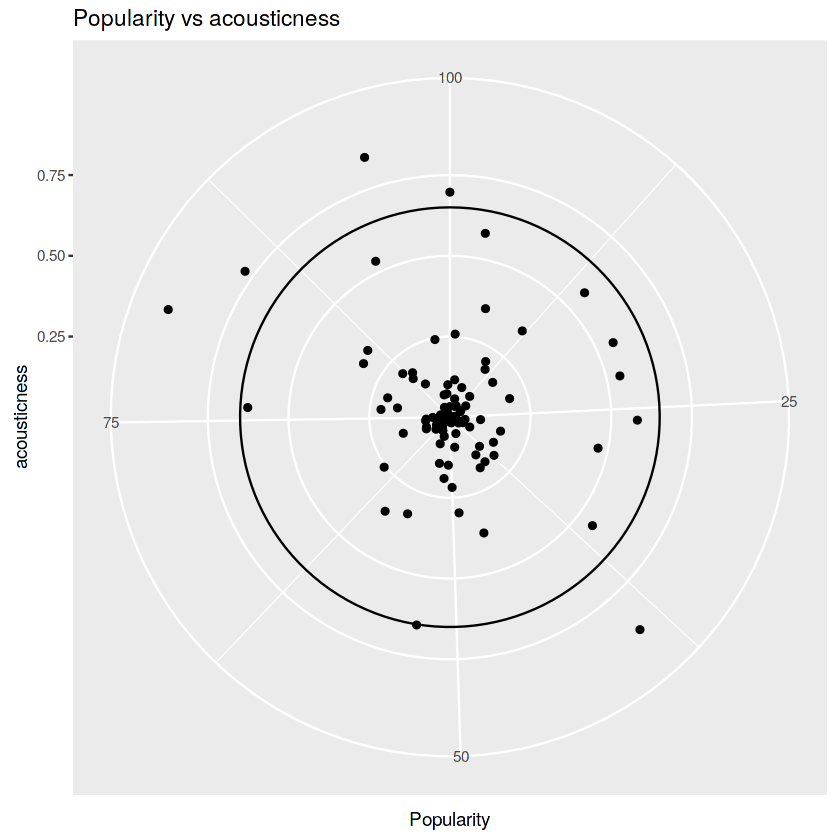

In [32]:
ggplot(my_list,aes(popularity,acousticness)) + 
  geom_point(stat="identity")+
  geom_abline(intercept = 0.65,slope=0)+
  labs(x="Popularity")+
  labs(y="acousticness")+
  labs(title = "Popularity vs acousticness")+
  coord_polar()

* **Accousticness vs Popularity :**
As per the music standards the lesser the acoustic more is the inclusion of electric sounds.
We could see that the concentration of the values is towards centre i.e approx 0.35 thus we can say that the maximum songs have inclusion of the electric sounds.

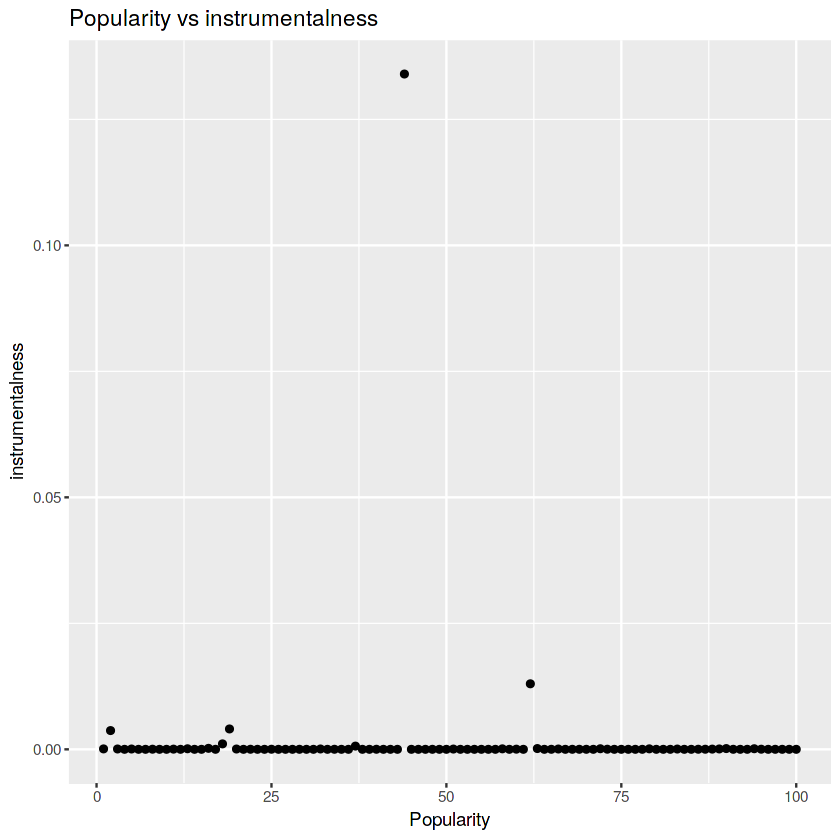

In [33]:
ggplot(my_list,aes(popularity,instrumentalness)) + 
  geom_point(stat="identity")+
  labs(x="Popularity")+
  labs(y="instrumentalness")+
  labs(title = "Popularity vs instrumentalness")

* **Instrumentalness vs Popularity:**
Instrumentalness < 0.01 
As per the music standards Instrumentalness less than 0.33 means the songs does not have speech.

**Try to predict one audio feature based on the others**

We further tried predicting the variable *Energy* using multiple regression.

In [34]:
#Splitting data into test and train.

sample_data <- sample(2,nrow(my_list_1),replace=TRUE,prob = c(0.8,0.2))

train_data <- my_list[sample_data == 1,]
test_data <- my_list[sample_data == 2,]

In [35]:
#Model creation
fit_linear <- lm(energy ~ loudness+danceability+valence+speechiness+acousticness+instrumentalness+liveness , data=train_data)

In [36]:
gvlma(fit_linear)


Call:
lm(formula = energy ~ loudness + danceability + valence + speechiness + 
    acousticness + instrumentalness + liveness, data = train_data)

Coefficients:
     (Intercept)          loudness      danceability      valencehappy  
       1.1705370         0.0501963        -0.2449872        -0.0432641  
      valencesad       speechiness      acousticness  instrumentalness  
      -0.0842197         0.2551245        -0.1654612         0.7497076  
        liveness  
       0.0001164  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit_linear) 

                     Value p-value                Decision
Global Stat        2.88291  0.5776 Assumptions acceptable.
Skewness           2.14649  0.1429 Assumptions acceptable.
Kurtosis           0.09543  0.7574 Assumptions acceptable.
Link Function      0.18196  0.6697 Assumptions acceptable.
Heteroscedasticity 0.45903  0.4981 Assumptions acceptable.

In [37]:
#feature selection - Backward elimination

step_1 <- stepAIC(fit_linear,direction = "backward")
step_1$anova  

Start:  AIC=-347.91
energy ~ loudness + danceability + valence + speechiness + acousticness + 
    instrumentalness + liveness

                   Df Sum of Sq     RSS     AIC
- liveness          1   0.00000 0.57047 -349.91
- instrumentalness  1   0.00952 0.57999 -348.67
<none>                          0.57047 -347.91
- valence           2   0.04451 0.61498 -346.27
- speechiness       1   0.04185 0.61231 -344.60
- danceability      1   0.05659 0.62706 -342.81
- acousticness      1   0.07664 0.64711 -340.45
- loudness          1   0.48272 1.05319 -303.92

Step:  AIC=-349.91
energy ~ loudness + danceability + valence + speechiness + acousticness + 
    instrumentalness

                   Df Sum of Sq     RSS     AIC
- instrumentalness  1   0.00953 0.58000 -350.67
<none>                          0.57047 -349.91
- valence           2   0.04467 0.61514 -348.25
- speechiness       1   0.04220 0.61267 -346.56
- danceability      1   0.05667 0.62714 -344.81
- acousticness      1   0.07948 0.6

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,66,0.5704696,-347.9088
- liveness,1,1.289772e-08,67,0.5704696,-349.9088
- instrumentalness,1,9.534655e-03,68,0.5800043,-350.6656


In [38]:
#Feature Selection - Both
step_2 <- stepAIC(fit_linear,direction = "both")
step_2$anova 

Start:  AIC=-347.91
energy ~ loudness + danceability + valence + speechiness + acousticness + 
    instrumentalness + liveness

                   Df Sum of Sq     RSS     AIC
- liveness          1   0.00000 0.57047 -349.91
- instrumentalness  1   0.00952 0.57999 -348.67
<none>                          0.57047 -347.91
- valence           2   0.04451 0.61498 -346.27
- speechiness       1   0.04185 0.61231 -344.60
- danceability      1   0.05659 0.62706 -342.81
- acousticness      1   0.07664 0.64711 -340.45
- loudness          1   0.48272 1.05319 -303.92

Step:  AIC=-349.91
energy ~ loudness + danceability + valence + speechiness + acousticness + 
    instrumentalness

                   Df Sum of Sq     RSS     AIC
- instrumentalness  1   0.00953 0.58000 -350.67
<none>                          0.57047 -349.91
- valence           2   0.04467 0.61514 -348.25
+ liveness          1   0.00000 0.57047 -347.91
- speechiness       1   0.04220 0.61267 -346.56
- danceability      1   0.05667 0.6

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,66,0.5704696,-347.9088
- liveness,1,1.289772e-08,67,0.5704696,-349.9088
- instrumentalness,1,9.534655e-03,68,0.5800043,-350.6656


In [39]:
#Final Model:
fit_final <- lm(energy ~ loudness + danceability +acousticness, data = train_data)


In [40]:
gvlma(fit_final)


Call:
lm(formula = energy ~ loudness + danceability + acousticness, 
    data = train_data)

Coefficients:
 (Intercept)      loudness  danceability  acousticness  
     1.09072       0.05283      -0.13862      -0.16224  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit_final) 

                     Value p-value                Decision
Global Stat        1.79046  0.7742 Assumptions acceptable.
Skewness           0.60886  0.4352 Assumptions acceptable.
Kurtosis           0.02262  0.8804 Assumptions acceptable.
Link Function      1.12324  0.2892 Assumptions acceptable.
Heteroscedasticity 0.03574  0.8500 Assumptions acceptable.

In [41]:
summary(fit_final) 


Call:
lm(formula = energy ~ loudness + danceability + acousticness, 
    data = train_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.253253 -0.063912  0.003978  0.070847  0.255997 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.090725   0.073674  14.805  < 2e-16 ***
loudness      0.052832   0.006472   8.164 8.31e-12 ***
danceability -0.138619   0.085313  -1.625  0.10863    
acousticness -0.162243   0.055338  -2.932  0.00453 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09588 on 71 degrees of freedom
Multiple R-squared:  0.5691,	Adjusted R-squared:  0.5509 
F-statistic: 31.26 on 3 and 71 DF,  p-value: 5.424e-13


In [42]:
predicted <- predict(fit_final,newdata = test_data)

In [43]:
observed <- test_data$energy

In [44]:
predicted
observed

3         6        18        20        29        31        34        35 
0.6686258 0.6303321 0.7521282 0.5667732 0.4106607 0.5711806 0.5419934 0.7916647 
       38        43        50        57        59        60        69        70 
0.7274906 0.7780661 0.7271618 0.6967709 0.6524986 0.7284286 0.6961022 0.7271114 
       79        83        85        89        92        93        95        98 
0.8133104 0.6141139 0.4938598 0.6907235 0.4596041 0.4970501 0.4782471 0.7536870 
      100 
0.5671391

[1] 0.535 0.563 0.773 0.581 0.391 0.559 0.691 0.889 0.807 0.730 0.598 0.785
[13] 0.750 0.745 0.597 0.798 0.813 0.621 0.299 0.679 0.346 0.505 0.570 0.760
[25] 0.586

In [45]:
SSE <- sum((observed - predicted) ^ 2)
SST <- sum((observed - mean(observed)) ^ 2)
r2 <- 1 - SSE/SST
rmse <- sqrt(mean((predicted - observed)^2))

In [46]:
r2

[1] 0.6884256

In [56]:
fit1 <- lm(energy~loudness,data=train_data)

In [57]:
summary(fit1)


Call:
lm(formula = energy ~ loudness, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21526 -0.08816  0.01064  0.06182  0.29230 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.984290   0.038820  25.355  < 2e-16 ***
loudness    0.056780   0.006598   8.606 1.02e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1015 on 73 degrees of freedom
Multiple R-squared:  0.5036,	Adjusted R-squared:  0.4968 
F-statistic: 74.06 on 1 and 73 DF,  p-value: 1.023e-12


**With the above model we obtained a considerable r2 value while predicting the variable energy using the variables loudness,danceability,acousticness **

**Conclusion**:

**Look for patterns in the audio features of the songs. Why do people stream these songs the most?**<br>
1.Energetic songs<br>
2.Time duration of the songs between 3-4 mins.<br>
3.High dancebility.<br>
4.Low Speechiness and low instrumentalness (very less speech in the songs)<br>
5.Low accousticness(more inclusion of electric sounds).<br>

**Try to predict one audio feature based on the others**<br>
With the above model we obtained a r2 value of ~ 72% while predicting the variable energy using the variables loudness,danceability,acousticness.

**See which features correlate the most**<br>
Energy and loudness correlate the most.